# **Solução Tarefa 06 - Identificando padrões (rede perceptron)**

## **Alunos: Yago Matheus da Silva Veloso e Paulo Roberto Santana dos Reis**

## **Carregando bibliotecas**

In [ ]:
import pandas as pd
import numpy as np
import warnings

## **Carregando banco de dados**

In [ ]:
df = pd.DataFrame(([-26,265,44, "Falha"],
                 [-18,370,32, "Falha"],
                 [-22,350,30, "Falha"],
                 [-10,320,29, "Falha"],
                 [-60,650,16, "Sucesso"],
                 [-20,225,46, "Falha"],
                 [-24,276,38, "Falha"],
                 [-15,270,40, "Falha"],
                 [-42,950,13, "Sucesso"],
                 [-12,220,32, "Falha"],
                 [-20,124,33, "Falha"],
                 [-42,750,24, "Sucesso"],
                 [-32,530,21, "Sucesso"],
                 [-40,916,22, "Sucesso"],
                 [-30,500,19, "Sucesso"],
                 [-25,412,30, "Falha"],
                 [-28,400,38, "Falha"]
                 ))
df.columns = ['PIN', 'VT (cm³)', 'TR (resp. por min.)', 'Resposta']
df

,PIN,VT (cm³),TR (resp. por min.),Resposta
0,-26,265,44,Falha
1,-18,370,32,Falha
2,-22,350,30,Falha
3,-10,320,29,Falha
4,-60,650,16,Sucesso
5,-20,225,46,Falha
6,-24,276,38,Falha
7,-15,270,40,Falha
8,-42,950,13,Sucesso
9,-12,220,32,Falha


In [ ]:
X = df.iloc[:, :-1]
for column in X.columns: 
    X[column] = X[column]  / X[column].abs().max() 
      
display(X)

,PIN,VT (cm³),TR (resp. por min.)
0,-0.433333,0.278947,0.956522
1,-0.300000,0.389474,0.695652
2,-0.366667,0.368421,0.652174
3,-0.166667,0.336842,0.630435
4,-1.000000,0.684211,0.347826
5,-0.333333,0.236842,1.000000
6,-0.400000,0.290526,0.826087
7,-0.250000,0.284211,0.869565
8,-0.700000,1.000000,0.282609
9,-0.200000,0.231579,0.695652


In [ ]:
X = np.array(X)
print(X)

[[-0.43333333  0.27894737  0.95652174]
 [-0.3         0.38947368  0.69565217]
 [-0.36666667  0.36842105  0.65217391]
 [-0.16666667  0.33684211  0.63043478]
 [-1.          0.68421053  0.34782609]
 [-0.33333333  0.23684211  1.        ]
 [-0.4         0.29052632  0.82608696]
 [-0.25        0.28421053  0.86956522]
 [-0.7         1.          0.2826087 ]
 [-0.2         0.23157895  0.69565217]
 [-0.33333333  0.13052632  0.7173913 ]
 [-0.7         0.78947368  0.52173913]
 [-0.53333333  0.55789474  0.45652174]
 [-0.66666667  0.96421053  0.47826087]
 [-0.5         0.52631579  0.41304348]
 [-0.41666667  0.43368421  0.65217391]
 [-0.46666667  0.42105263  0.82608696]]


In [ ]:
np.shape(X)

(17, 3)

In [ ]:
y = df.iloc[:, -1].values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y = np.array(y).T
print(y)

[0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 0 0]


In [ ]:
np.shape(y)

(17,)

## **Construção e treinamento do modelo de redes neurais**

### Criação do modelo de RNA com o algoritmo do Backpropagation **(Com limite threshold)**

In [ ]:
class RedeNeural(object):
  warnings.filterwarnings('ignore')
  def __init__(self): # self representa a instância de uma classe (programação orientada ao objeto), com isso conseguimos acessar a atributos e métodos dentro de uma classe no python
    #Número de neurônios na rede
    self.camadaentrada = 3
    self.camadasaida = 1
    self.camadaoculta = 6

    #Inicialização dos pesos
    self.W_hi = np.random.randn(self.camadaentrada, self.camadaoculta) # Matriz de pesos (3x6) da entrada para camada oculta
    self.W_ij = np.random.randn(self.camadaoculta, self.camadasaida) # Matriz de pesos (6x1) da camada oculta para camada de saída

  
  # Definição do passo a frente da rede (forward)
  def feedForward(self, X):
    threshold = 0.6
    # Propagação do forward pela rede neural
    self.hi = np.dot(X,self.W_hi) # Produto da matriz X (entradas) pela matriz de pesos W_hi (primeira camada) (3x6)
    self.hi_f = self.tan_hiper(self.hi) # Função de ativação tangente hiperbólica
    self.ij = np.dot(self.hi_f, self.W_ij) # Produto da matriz intermediária pela matriz de pesos W_ij (segunda camada) (6x1)
    output = self.sigmoide(self.ij) # Função de ativação sigmoide - saída do modelo

    for i in range(len(output)):
      if ((output[i] >= threshold).all()):
        output[i] = 1
    return output
  
  # Definição da função tangente hiperbólica (função e a derivada da função)
  def tan_hiper(self, s, deriv = False):
    if (deriv == True):
      return 0.5*(1-s)
    return (1- np.exp(-s))/(1+ np.exp(-s))

  # Definição da função sigmoide (função e a derivada da função)
  def sigmoide(self, s, deriv = False):
    if (deriv == True):
      return s*(1-s)
    return 1/(1+ np.exp(-s))
  
  # Definição do passo a trás da rede (backward)
  def backward(self, X, y, output):
    #Definição taxa de aprendizagem
    taxa_ap = 0.01

    #self.output_error = (y - output)
    self.output_error = (2*(y - output))/(len(X))
    self.output_delta = self.output_error * self.sigmoide(output, deriv = True) # Aplicando a regra delta para retropropagação do erro, nesse caso para a camada W_ij
    self.output_delta = self.output_delta.T

    self.hi_f_error = self.output_delta.dot(self.W_ij.T) # Erro W_ij: Calculando o quanto a camada W_ij contribui para o erro do modelo
    self.hi_f_delta = self.hi_f_error * self.tan_hiper(self.hi_f, deriv = True) # Aplicando a derivada da tangente hiperbólica para o erro da camada W_ij

    self.W_hi += X.T.dot(self.hi_f_delta)*taxa_ap # Ajustando os pesos entre a camada de entrada e a intermediária
    self.W_ij += self.hi_f.T.dot(self.output_delta)*taxa_ap # Ajustando os pesos entre a camada intermediária e a de saída

  def train(self, X,y):
    threshold = 0.6
    output_ = self.feedForward(X)
    output_ = output_.T
    for i in range(len(output_)):
      if ((output_[i] >= threshold).all()):
        output_[i] = 1    
    self.backward(X,y, output_)


    return output_

RNA = RedeNeural()

### Criação do modelo de RNA com o algoritmo do Backpropagation **(Sem limite threshold)**

In [ ]:
class RedeNeural(object):
  warnings.filterwarnings('ignore')
  def __init__(self):
    #Número de neurônios na rede
    self.camadaentrada = 3
    self.camadasaida = 1
    self.camadaoculta = 6

    #Inicialização dos pesos
    self.W_hi = np.random.randn(self.camadaentrada, self.camadaoculta) # Matriz de pesos (3x6) da entrada para camada oculta
    self.W_ij = np.random.randn(self.camadaoculta, self.camadasaida) # Matriz de pesos (6x1) da camada oculta para camada de saída

  
  # Definição do passo a frente da rede (forward)
  def feedForward(self, X):
    # Propagação do forward pela rede neural
    self.hi = np.dot(X,self.W_hi) # Produto da matriz X (entradas) pela matriz de pesos W_hi (primeira camada) (3x6)
    self.hi_f = self.tan_hiper(self.hi) # Função de ativação tangente hiperbólica
    self.ij = np.dot(self.hi_f, self.W_ij) # Produto da matriz intermediária pela matriz de pesos W_ij (segunda camada) (6x1)
    output = self.sigmoide(self.ij) # Função de ativação sigmoide - saída do modelo   
    return output
  
  # Definição da função tangente hiperbólica (função e a derivada da função)
  def tan_hiper(self, s, deriv = False):
    if (deriv == True):
      return 0.5*(1-s)
    return (1- np.exp(-s))/(1+ np.exp(-s))

  # Definição da função sigmoide (função e a derivada da função)
  def sigmoide(self, s, deriv = False):
    if (deriv == True):
      return s*(1-s)
    return 1/(1+ np.exp(-s))
  
  # Definição do passo a trás da rede (backward)
  def backward(self, X, y, output):
    #Definição taxa de aprendizagem
    taxa_ap = 0.01

    #self.output_error = (y - output)
    self.output_error = (2*(y - output))/(len(X))
    self.output_delta = self.output_error * self.sigmoide(output, deriv = True) # Aplicando a regra delta para retropropagação do erro, nesse caso para a camada W_ij
    self.output_delta = self.output_delta.T

    self.hi_f_error = self.output_delta.dot(self.W_ij.T) # Erro W_ij: Calculando o quanto a camada W_ij contribui para o erro do modelo
    self.hi_f_delta = self.hi_f_error * self.tan_hiper(self.hi_f, deriv = True) # Aplicando a derivada da tangente hiperbólica para o erro da camada W_ij

    self.W_hi += X.T.dot(self.hi_f_delta)*taxa_ap # Ajustando os pesos entre a camada de entrada e a intermediária
    self.W_ij += self.hi_f.T.dot(self.output_delta)*taxa_ap # Ajustando os pesos entre a camada intermediária e a de saída

  def train(self, X,y):
    output_ = self.feedForward(X)
    output_ = output_.T  
    self.backward(X,y, output_)
    return output_

RNA = RedeNeural()

### Treinando o modelo de RNA

In [ ]:
# Definindo o número de Epochs máximo
n_epoch_max = 100000
output_error = 0
erro_desejado = 0.03
error = []
import matplotlib.pyplot as plt 

for i in range(n_epoch_max):
  if (i %1000 == 0):
    print ("Número de Epochs", i)
  RNA.train(X,y)
  output_error = np.mean(np.square(y- RNA.train(X,y)))
  error.append(output_error)

  if output_error <= erro_desejado:
    print("\n")
    print("Erro:", output_error)
    break


print("\n")
print("Valores preditos de saída:\n", RNA.feedForward(X))
print("\n")
print("Valores reais de saída\n", y)

Número de Epochs 0
Número de Epochs 1000
Número de Epochs 2000
Número de Epochs 3000
Número de Epochs 4000
Número de Epochs 5000
Número de Epochs 6000
Número de Epochs 7000
Número de Epochs 8000
Número de Epochs 9000
Número de Epochs 10000
Número de Epochs 11000
Número de Epochs 12000
Número de Epochs 13000
Número de Epochs 14000
Número de Epochs 15000
Número de Epochs 16000
Número de Epochs 17000
Número de Epochs 18000
Número de Epochs 19000
Número de Epochs 20000
Número de Epochs 21000
Número de Epochs 22000


Erro: 0.0029998779868035245


Valores preditos de saída:
 [[0.00274103]
 [0.0359843 ]
 [0.05918972]
 [0.02943379]
 [0.99603047]
 [0.00130736]
 [0.00722072]
 [0.00318864]
 [0.99906819]
 [0.00802876]
 [0.00533772]
 [0.97772954]
 [0.87210214]
 [0.9950278 ]
 [0.88221415]
 [0.11795469]
 [0.02202986]]


Valores reais de saída
 [0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 0 0]


Foi setado o valor de **0.03** para o erro para melhorar a convergência do algoritmo.

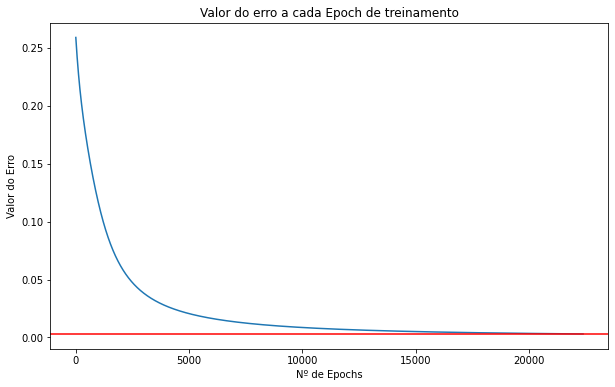

In [ ]:
plt.figure(figsize = (10,6)) 
plt.plot(range(i+1), error)
plt.axhline(y = erro_desejado, color = 'r', linestyle = '-') 
#y1 = erro_desejado
 
#plt.plot(range(i+1), y1, '-.') 

plt.xlabel("Nº de Epochs")  
plt.ylabel("Valor do Erro")  
plt.title("Valor do erro a cada Epoch de treinamento")  
plt.show()

## **Testando a rede com o banco de teste**

In [ ]:
df_test = pd.DataFrame(([-15,450,25, "Falha"],
                 [-22,400,41, "Falha"],
                 [-28,310,24, "Falha"],
                 [-34,530,28, "Sucesso"],
                 [-40,740,19, "Sucesso"],
                 [-42,550,27, "Sucesso"],
                 [-55,480,19, "Sucesso"],
                 ))
df_test.columns = ['PIN', 'VT (cm³)', 'TR (resp. por min.)', 'Resposta']
df_test

,PIN,VT (cm³),TR (resp. por min.),Resposta
0,-15,450,25,Falha
1,-22,400,41,Falha
2,-28,310,24,Falha
3,-34,530,28,Sucesso
4,-40,740,19,Sucesso
5,-42,550,27,Sucesso
6,-55,480,19,Sucesso


In [ ]:
X_test = df_test.iloc[:, :-1]
for column in X_test.columns: 
    X_test[column] = X_test[column]  / X_test[column].abs().max() 
      
display(X_test)

,PIN,VT (cm³),TR (resp. por min.)
0,-0.272727,0.608108,0.609756
1,-0.400000,0.540541,1.000000
2,-0.509091,0.418919,0.585366
3,-0.618182,0.716216,0.682927
4,-0.727273,1.000000,0.463415
5,-0.763636,0.743243,0.658537
6,-1.000000,0.648649,0.463415


In [ ]:
y_test = df_test.iloc[:, -1].values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_test = le.fit_transform(y_test)
y_test = np.array(y_test).T
print(y_test)

[0 0 0 1 1 1 1]


In [ ]:
y_pred = RNA.feedForward(X_test)
output_error_test = np.mean(np.square(y_test- y_pred))

print("Valores preditos pelo modelo utilizando os dados de teste:\n", y_pred)
print("\n")
print("Valores reais de y teste:\n", y_test)
print("\n")
print("Erro para o banco de teste:\n", output_error_test)

Valores preditos pelo modelo utilizando os dados de teste:
 [[0.39378543]
 [0.00858315]
 [0.26617419]
 [0.7346823 ]
 [0.9970153 ]
 [0.89106653]
 [0.98497155]]


Valores reais de y teste:
 [0 0 0 1 1 1 1]


Erro para o banco de teste:
 0.376682867307459
